<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Likelihood_of_approving_a_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 
Predicting the Likelihood of approval of loan based on Financial History. 

##Significance of analysis. 
- Rising Non Perfoming assets in country is not hidden in country. Every financial institution is affected by this threat. 
- Rising NPAs undermine the bank’s image, making the public lose trust in banks. The depositors may withdraw their deposits causing liquidity issues for banks.
- The lack of liquidity prevents banks from lending for other productive activities in the economy. 
- The curb in investments may slow down the economy leading to unemployment, inflation, bear market, etc.
- To maintain their profit margins, banks will be forced to increase interest rates which again hurt the economy.

Data Source 
https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random 
import time 

**Mounting google drive**

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/financial_data.csv')


In [44]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [46]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Checking the Missing Values

<Axes: >

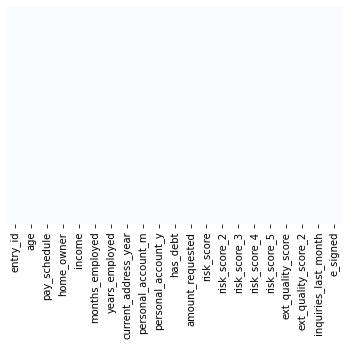

In [47]:
sns.heatmap(data.isnull(), yticklabels = False, cbar= False, cmap = 'Blues')

In [48]:
data.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

No missing values. 

### Data Visualization

array([[<Axes: title={'center': 'entry_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'home_owner'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'months_employed'}>,
        <Axes: title={'center': 'years_employed'}>,
        <Axes: title={'center': 'current_address_year'}>,
        <Axes: title={'center': 'personal_account_m'}>],
       [<Axes: title={'center': 'personal_account_y'}>,
        <Axes: title={'center': 'has_debt'}>,
        <Axes: title={'center': 'amount_requested'}>,
        <Axes: title={'center': 'risk_score'}>],
       [<Axes: title={'center': 'risk_score_2'}>,
        <Axes: title={'center': 'risk_score_3'}>,
        <Axes: title={'center': 'risk_score_4'}>,
        <Axes: title={'center': 'risk_score_5'}>],
       [<Axes: title={'center': 'ext_quality_score'}>,
        <Axes: title={'center': 'ext_quality_score_2'}>,
        <Axes: title={'center': 'inquiries_last_month'}>,
        <Axes: title={'c

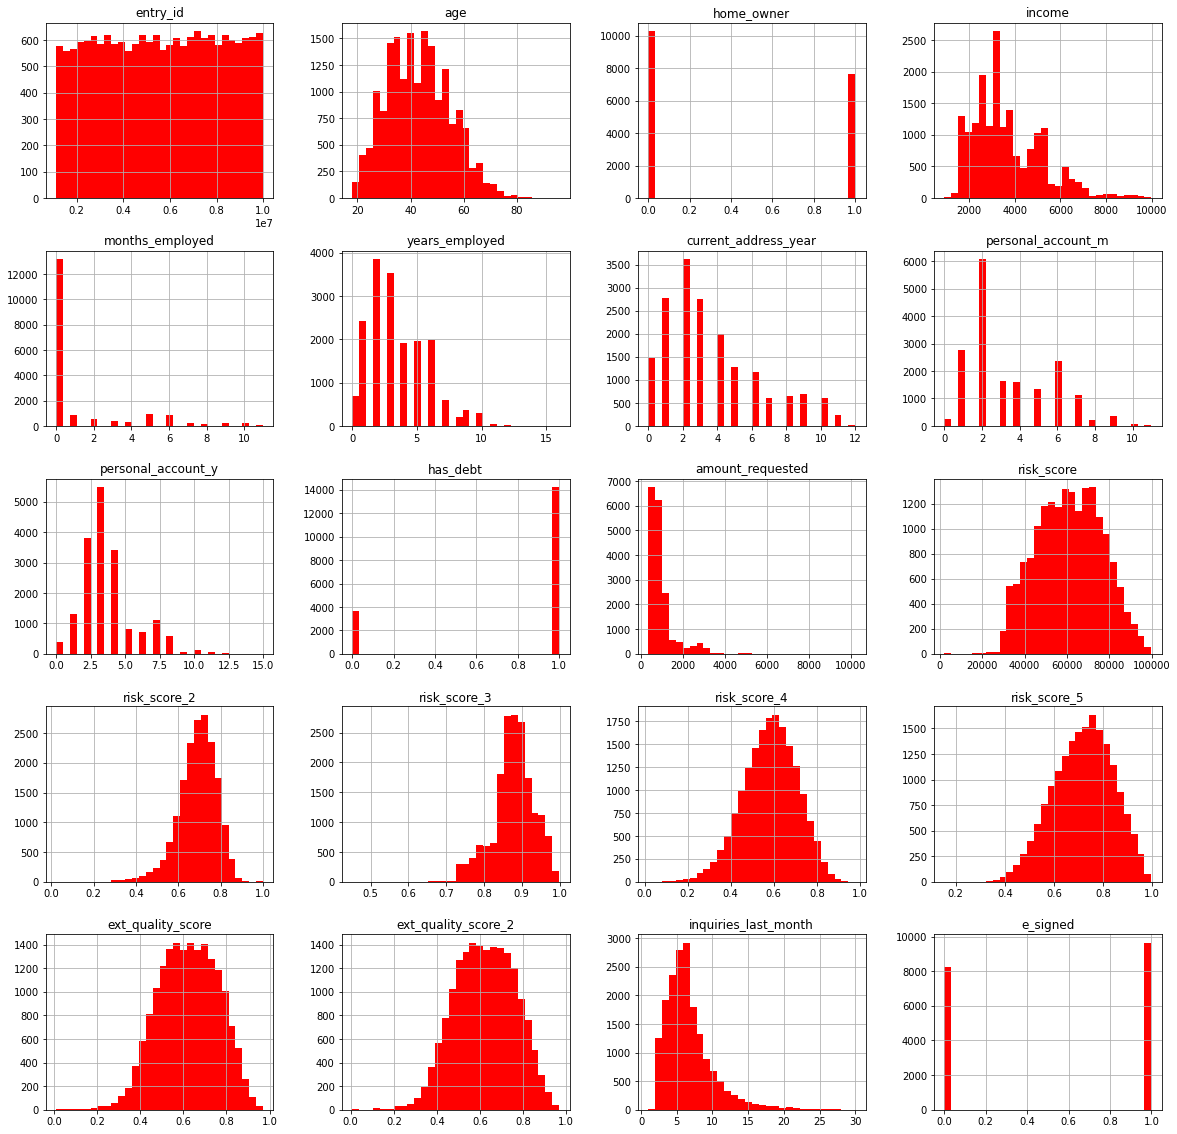

In [49]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [50]:
dataset = data.drop(columns = ['entry_id', 'pay_schedule', 'months_employed'])

In [51]:
dataset

,age,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,1,3135,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,0,3180,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,0,1540,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,0,5230,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,0,3590,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,46,0,6525,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,46,0,2685,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,42,0,2515,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


### Checking correlation of Target variable with other features. 

<Axes: title={'center': 'Correlation with E signed'}>

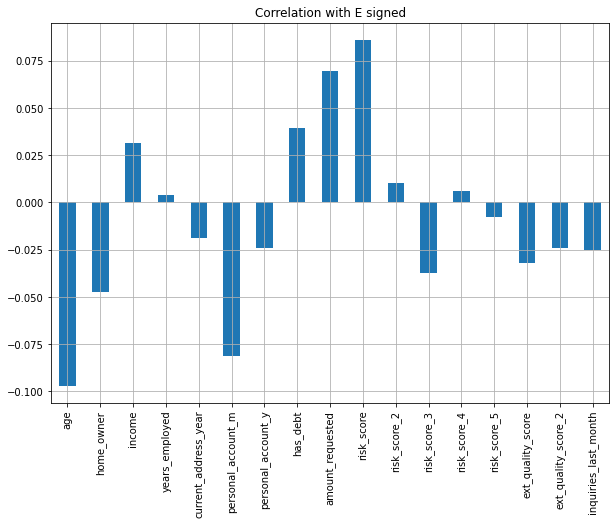

In [52]:
dataset.drop(columns = ['e_signed']).corrwith(dataset['e_signed']).plot.bar(
    figsize = (10,7),
    title = 'Correlation with E signed',
    fontsize = 10,
    rot = 90,
    grid = True
)

### Analysing the data of approved and not approved data separately. 
Doing this to check any big differences in attributes. 

In [53]:
signed = dataset[dataset['e_signed']==1]
not_signed = dataset[dataset['e_signed']==0]


In [54]:
print("Total No. of applications: ", len(dataset))
print("No. of Loans approved: ", len(signed))
print("Percentage of Loans approved", len(signed)/len(dataset)*100, '%')

print("No. of loans rejected: ", len(not_signed))
print("Percentage of Loans Not approved", len(not_signed)/len(dataset)*100, '%')




Total No. of applications:  17908
No. of Loans approved:  9639
Percentage of Loans approved 53.82510609783338 %
No. of loans rejected:  8269
Percentage of Loans Not approved 46.17489390216663 %


In [55]:
signed.describe()

,age,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.0
mean,41.948750,0.403465,3700.947712,3.534703,3.536363,3.260504,3.459591,0.810043,995.457931,62313.881108,0.691755,0.876382,0.583867,0.717409,0.618955,0.618923,6.371615,1.0
std,11.607473,0.490618,1563.334564,2.299484,2.753010,2.133413,2.000312,0.392288,693.520970,15225.318076,0.089691,0.056412,0.124626,0.121994,0.142942,0.141300,3.527570,0.0
min,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2800.000000,0.023258,0.529718,0.083435,0.153367,0.010184,0.006622,1.000000,1.0
25%,33.000000,0.000000,2560.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,50700.000000,0.642754,0.849625,0.501466,0.632432,0.516904,0.517351,4.000000,1.0
50%,41.000000,0.000000,3275.000000,3.000000,3.000000,2.000000,3.000000,1.000000,701.000000,62700.000000,0.700292,0.878962,0.587966,0.725166,0.621867,0.620967,6.000000,1.0
75%,50.000000,1.000000,4745.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,73700.000000,0.753182,0.912496,0.672707,0.807169,0.728188,0.725916,8.000000,1.0
max,87.000000,1.000000,9985.000000,16.000000,12.000000,11.000000,14.000000,1.000000,4200.000000,99750.000000,0.988087,0.999024,0.976803,0.996260,0.970249,0.966953,30.000000,1.0


In [56]:
not_signed.describe()

,age,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.000000,8269.0
mean,44.258798,0.450478,3606.235941,3.517717,3.641069,3.621478,3.554360,0.778329,897.977506,59655.339219,0.689855,0.880484,0.582325,0.719235,0.627959,0.625734,6.557020,0.0
std,12.057605,0.497572,1432.167933,2.212596,2.749779,2.294353,1.900933,0.415396,700.754938,15467.285367,0.091366,0.052243,0.125569,0.119168,0.135735,0.138164,3.833565,0.0
min,18.000000,0.000000,1015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.049926,0.451371,0.016724,0.160915,0.010184,0.135961,1.000000,0.0
25%,35.000000,0.000000,2600.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,47650.000000,0.638959,0.853026,0.498743,0.635397,0.527258,0.523133,4.000000,0.0
50%,44.000000,0.000000,3245.000000,3.000000,3.000000,3.000000,3.000000,1.000000,700.000000,59550.000000,0.698392,0.881116,0.588492,0.725107,0.630280,0.625455,6.000000,0.0
75%,53.000000,1.000000,4575.000000,5.000000,5.000000,6.000000,4.000000,1.000000,1050.000000,71650.000000,0.752471,0.913607,0.672151,0.806112,0.731686,0.732586,8.000000,0.0
max,96.000000,1.000000,9834.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,98900.000000,0.999997,0.997890,0.978932,0.993363,0.958013,0.961244,30.000000,0.0


**Observations:** 
- Mean `age` of Candidates with 'loan approved' is **lower** than that of 'loan not approved'
- Mean `income` of Candidates with 'loan approved' is **higher** than that of 'loan not approved'
- Mean `Debt` of Candidates with 'loan approved' is **higher** than that of 'loan not approved'
- Mean `Amount Requested` of Candidates with 'loan approved' is **higher** than that of 'loan not approved'
- Mean `Risk Score` of Candidates with 'loan approved' is **higher** than that of 'loan not approved'

Rest all the values have very slight difference, although this slight difference can aggregate to make major differences. 

<Axes: >

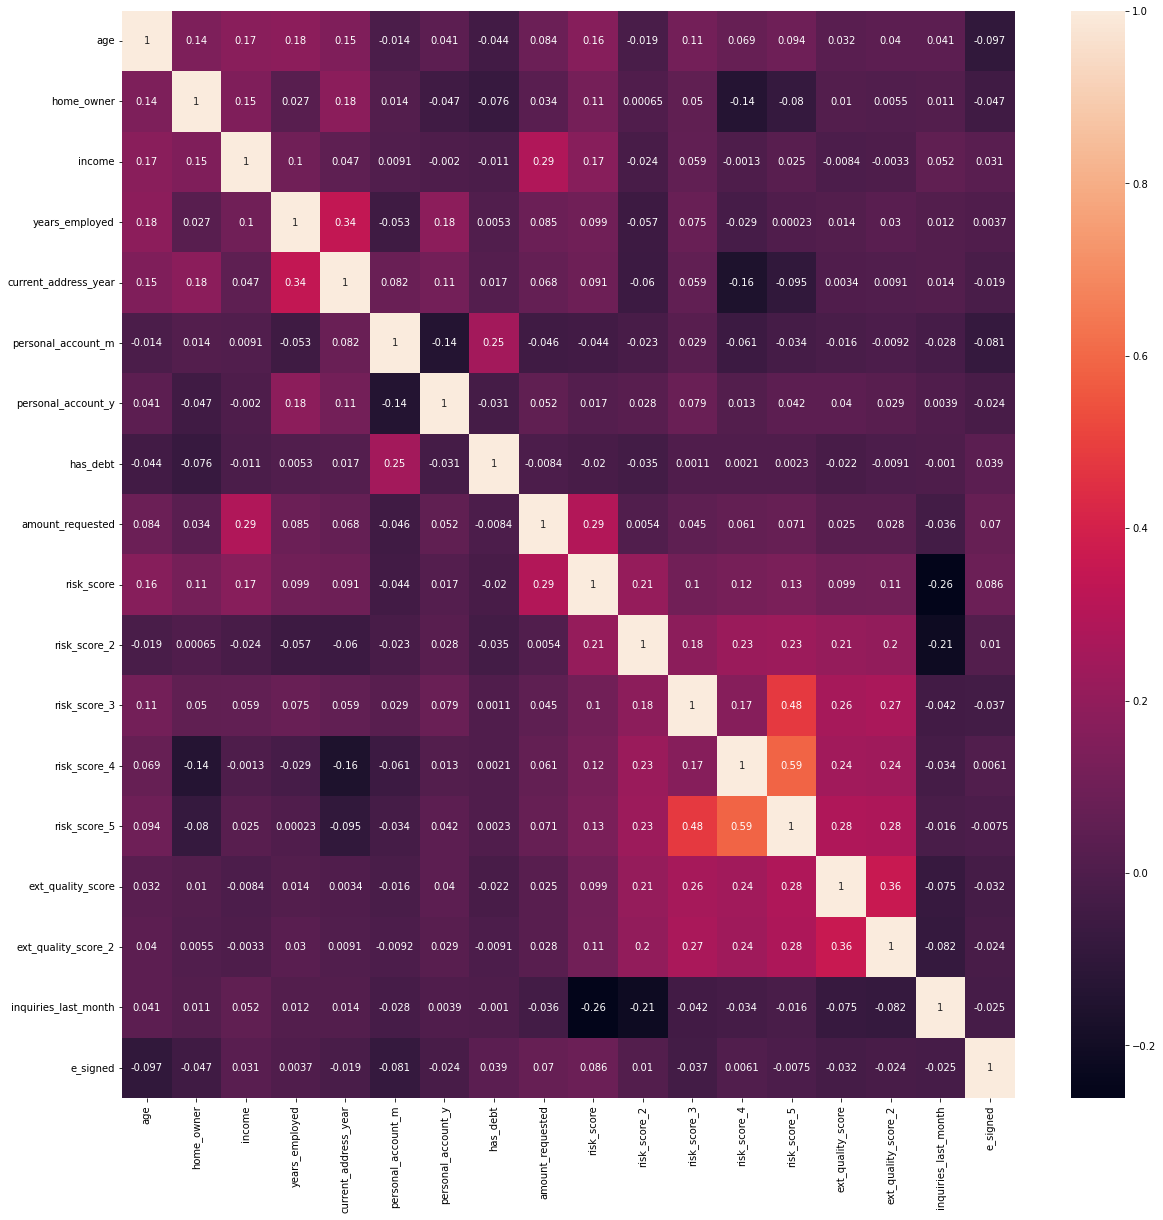

In [57]:
correlations = dataset.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True )

**Observations from heatmap:** 
- `ext_quality_score` and `risk_score` are correlated 
- `amount requested` and `income` are correlated
- all `risk_score`s are correlated with each other. 

#KDE (Kernel Density Estimate) 
- Using it for visualising the probability density of a continous variable
- It describes probability density at different values in a continous variable. 

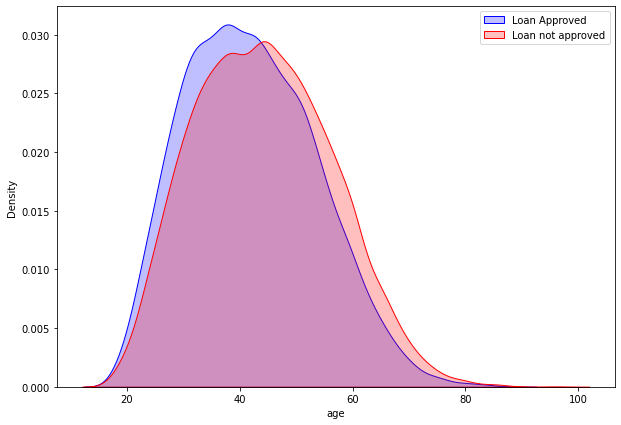

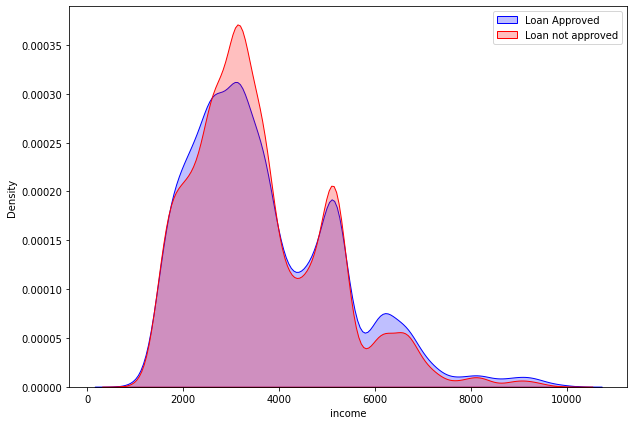

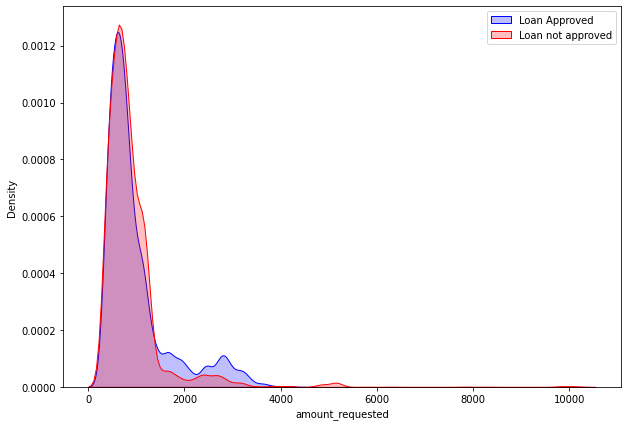

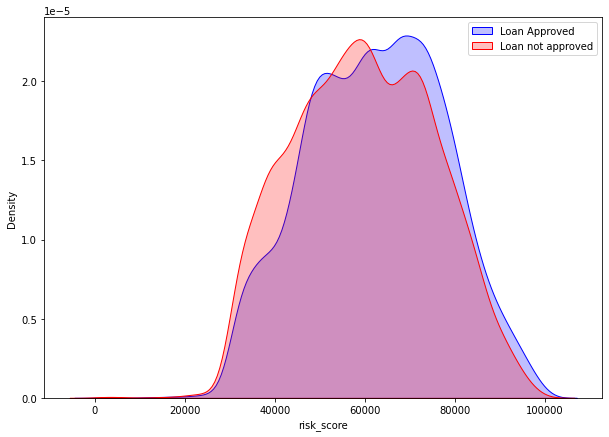

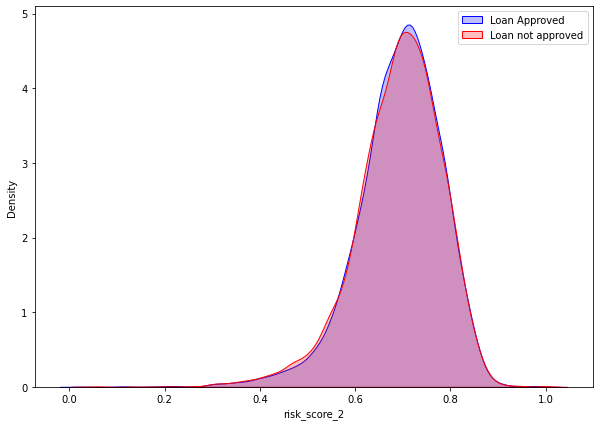

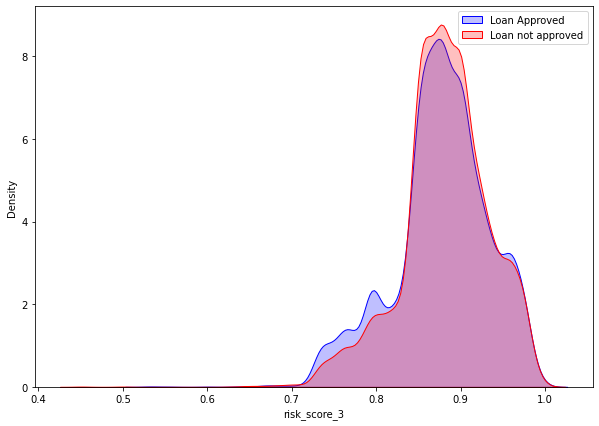

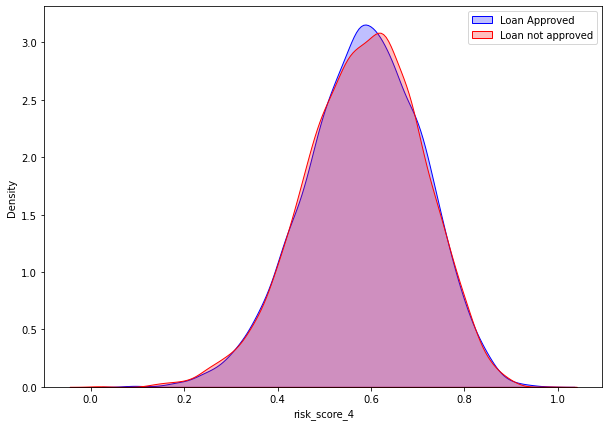

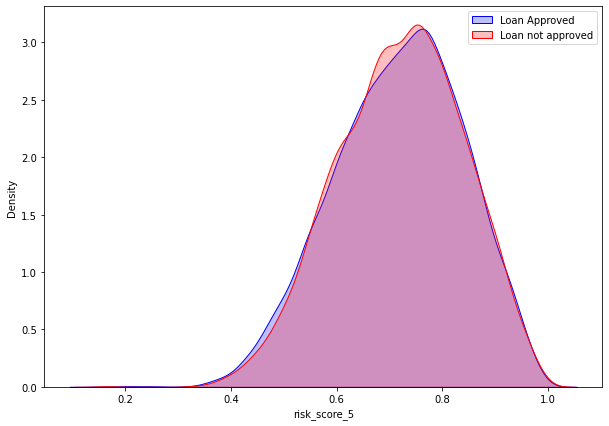

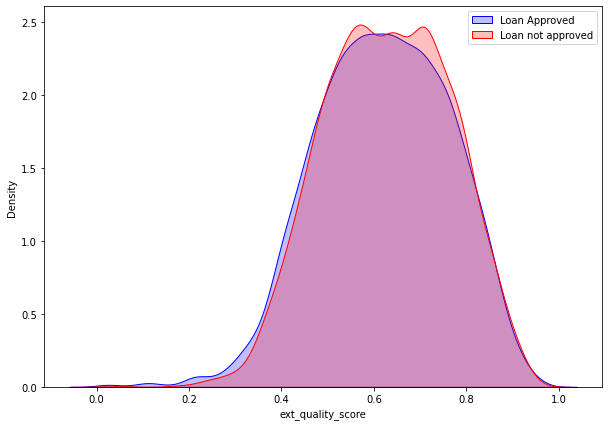

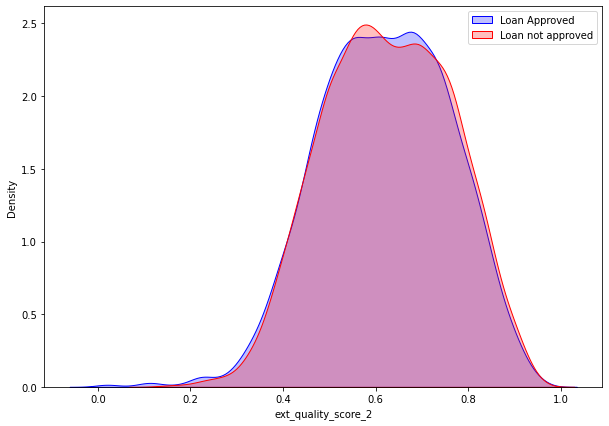

In [58]:
continous_featurs= ['age', 'income', 'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score', 'ext_quality_score_2',]

for col in continous_featurs:
  plt.figure(figsize = (10,7))
  sns.kdeplot(signed[col], label = 'Loan Approved', fill = True, color ='b')
  sns.kdeplot(not_signed[col], label = 'Loan not approved', fill = True, color ='r')
  plt.xlabel(col)
  plt.legend()

In [59]:
categorical = ['home_owner', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt']

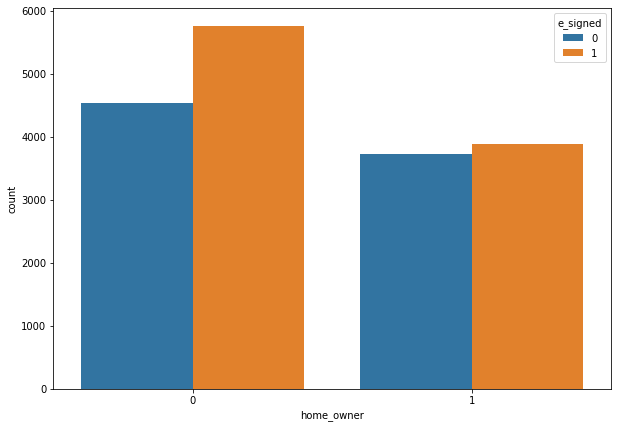

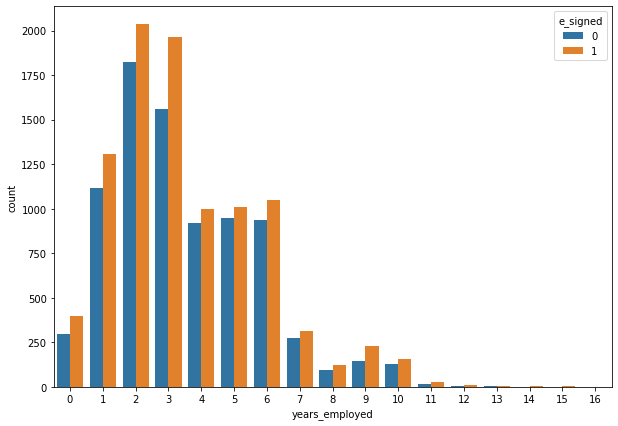

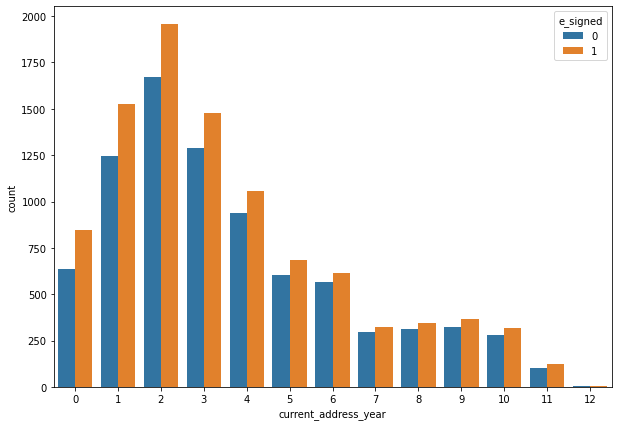

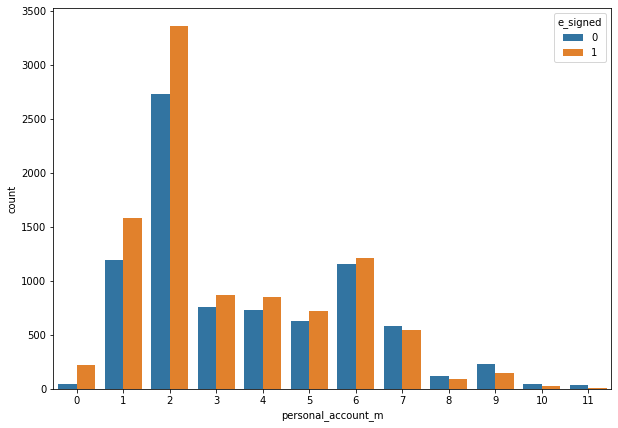

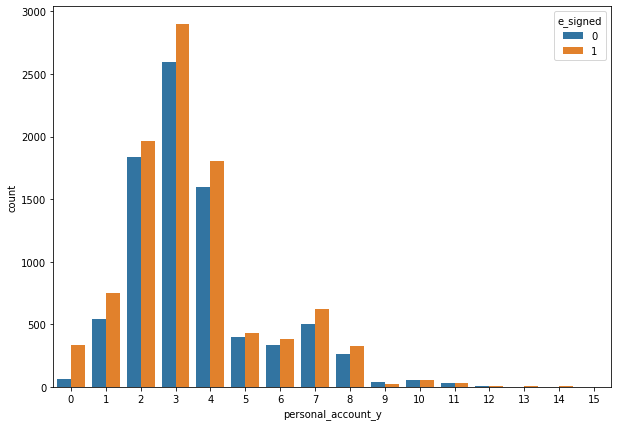

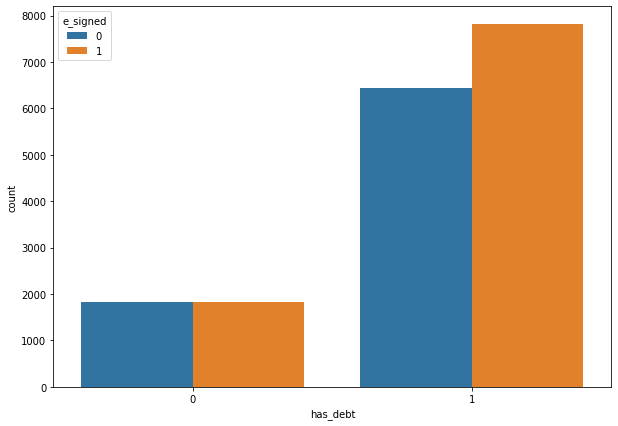

In [60]:
for col in categorical:
  plt.figure(figsize = (10,7))
  sns.countplot(x = dataset[col], hue = dataset.e_signed)

In [61]:
#feature engineerring 

dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset = dataset.drop(columns = ['personal_account_m','personal_account_y'])


In [62]:
dataset.columns

Index(['age', 'home_owner', 'income', 'years_employed', 'current_address_year',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed',
       'personal_account_months'],
      dtype='object')

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17908 non-null  int64  
 1   home_owner               17908 non-null  int64  
 2   income                   17908 non-null  int64  
 3   years_employed           17908 non-null  int64  
 4   current_address_year     17908 non-null  int64  
 5   has_debt                 17908 non-null  int64  
 6   amount_requested         17908 non-null  int64  
 7   risk_score               17908 non-null  int64  
 8   risk_score_2             17908 non-null  float64
 9   risk_score_3             17908 non-null  float64
 10  risk_score_4             17908 non-null  float64
 11  risk_score_5             17908 non-null  float64
 12  ext_quality_score        17908 non-null  float64
 13  ext_quality_score_2      17908 non-null  float64
 14  inquiries_last_month  

In [64]:
X = dataset.drop(columns = ['e_signed'])
X[:5]

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,30
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,86
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,19
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,86
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,98


In [65]:
y = dataset.e_signed
y[:5]

0    1
1    0
2    0
3    1
4    0
Name: e_signed, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state = 42)

In [67]:
len(X_train), len(X_test), len(y_train), len(y_test)

(14326, 3582, 14326, 3582)

In [68]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#StandardScaler return a Numpy arrey so we need to convert to a dataframe 
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))


In [69]:
#check if training set is balanced
y_train.value_counts()

1    7709
0    6617
Name: e_signed, dtype: int64

#Model Building 

In [83]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


In [84]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Approved', 'Approved']); ax.yaxis.set_ticklabels(['Not Approved', 'Approved']) 
    plt.show() 

In [85]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-25 04:17:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-25 04:17:45 (90.4 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [86]:
from helper_functions import calculate_results

###Compare baseline classification algorithm 
Model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores. <br>
Classifcation accuracy is the number of correct predictions mada as a ratio of total predictions. 
When we have class imbalance issue, we sort the results based on 'Mean AUC' value, which the model' ability to discriminate b/w positive and negative classes. 

In [87]:
models = []

Logistic regresion : linear model for classification. 
- Solver : algorithm to use in optimization problem. For small datasets, `liblineaar` is good, `sag` and `saga` for large ones. 
- class_weight = Weights associated with classes in form `class_label: weight`. If not given, all classes are supposed to have weight one.


In [88]:
models.append(('Logistic Regression', LogisticRegression(solver = 'liblinear',
                                                        random_state = None,
                                                        class_weight = 'balanced')))

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.


In [89]:
models.append(('SVC', SVC(kernel = 'linear', random_state = None)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = None)))

KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. 
- `n_neighbors` : Number of neighbors to use by default for kneighbors queries.
- `metric` = the distance metric to use for the tree.
- `p` = Power parameter for the Minkowski metric. this is equivalent to euclidean_distance (l2) for p = 2

In [90]:
models.append(('KNN', KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)))

In [91]:
models.append(('Gaussian NB', GaussianNB()))

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- `criterion`: The function to measure the quality of a split
- `entropy` for the information gain.

In [92]:
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = None)))

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
- A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- `n_estimators`: The number of trees in the forest.

In [93]:
models.append(('Random Forest', RandomForestClassifier(n_estimators =100, criterion = 'entropy', random_state = None)))

###Evaluation model results

In [94]:
acc_results = []
auc_results = []
names = []

#setting table to populate with performance results 
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns = col)

###Evaluating each model using k-fold cross-validation:
 


In [95]:
i = 0
for name, model in models:
  kfold = model_selection.KFold(n_splits =10, random_state = None)

#accuracy scoring 
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')

#roc_auc scoring 
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, 
                          round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)
                          ]
  i+=1
model_results.sort_values(by = ['ROC AUC Mean'], ascending = False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,67.80,0.61,62.67,1.11
2,Kernel SVM,64.57,0.56,60.82,0.75
0,Logistic Regression,59.95,0.98,57.10,0.97
1,SVC,59.87,0.90,57.73,1.08
4,Gaussian NB,59.76,0.78,57.41,0.88
3,KNN,57.33,1.69,55.51,1.53
5,Decision Tree Classifier,57.10,1.16,57.62,1.30


**Visualize Classification Algorithms Accuracy Comparisons:**

Using Accuracy Mean


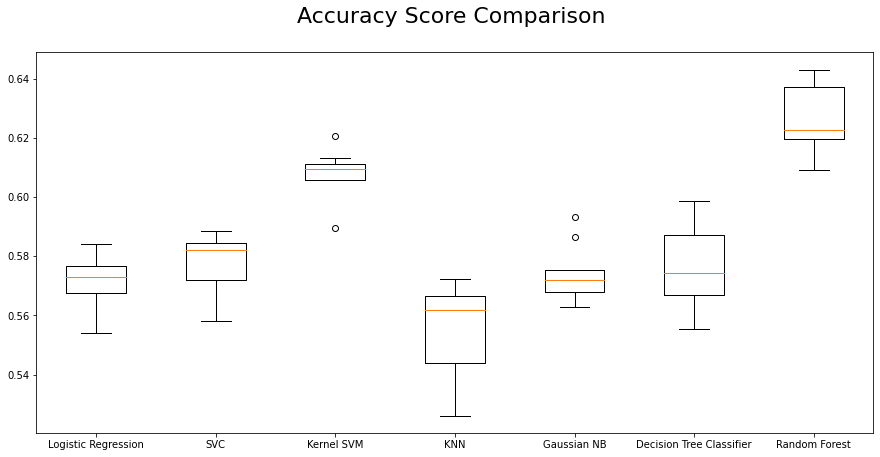

In [96]:
fig = plt.figure(figsize = (15, 7))
ax=fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.show()

Using Area under ROC Curve:


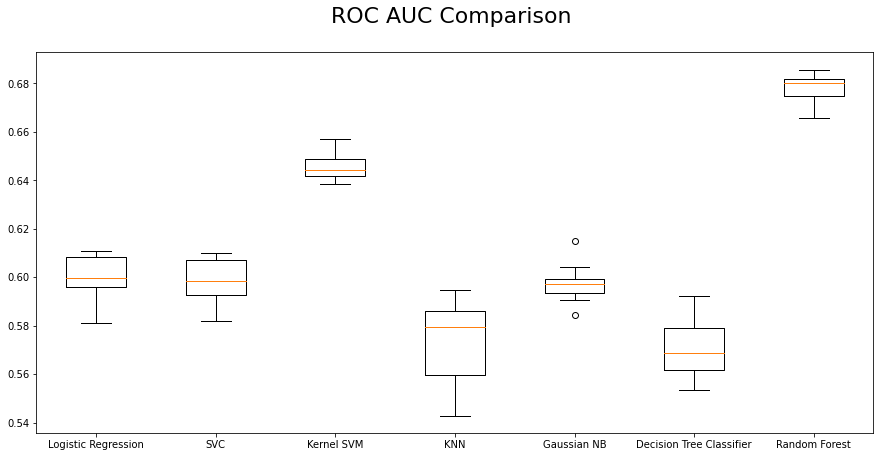

In [97]:
fig =plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.title('ROC AUC Comparison \n', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.show()

Get the right parameters for the baseline models: let’s optimize the parameters and finalize the evaluation metrics for model selection.



Identify the optimal number of trees for Random Forest Model:


## Finding the best parameters via `GridSearchCV()`

Logistic Regression 

In [100]:
grid = {"C":np.logspace(-3,3,7), 
       "penalty":["l2"]} # l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.5752490672769164


In [101]:
#using the tuned hyperparameters
lr = LogisticRegression(C = 0.001, penalty= 'l2').fit(X_train, y_train)
LR_result = calculate_results(y_true = y_test,
                              y_pred = lr.predict(X_test))
LR_result

{'accuracy': 57.45393634840871,
 'precision': 0.5712706356685952,
 'recall': 0.5745393634840871,
 'f1': 0.5560638371610807}

Support Vector Machine

In [102]:
# param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
# grid = GridSearchCV(SVC(), param_grid, refit = True)
# grid.fit(X_train,y_train)
# print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
# print("accuracy :",grid.best_score_)


In [103]:
svm = SVC().fit(X_train, y_train)
SVM_result = calculate_results(y_true = y_test,
                              y_pred = svm.predict(X_test))
SVM_result

{'accuracy': 61.16694584031267,
 'precision': 0.6096282193081061,
 'recall': 0.6116694584031267,
 'f1': 0.6063088367872402}

In [104]:
kernel = SVC(kernel = 'rbf').fit(X_train, y_train)
kernel_SVM_result = calculate_results(y_true = y_test,
                              y_pred = kernel.predict(X_test))
kernel_SVM_result

{'accuracy': 61.16694584031267,
 'precision': 0.6096282193081061,
 'recall': 0.6116694584031267,
 'f1': 0.6063088367872402}

Random Forest Classifier

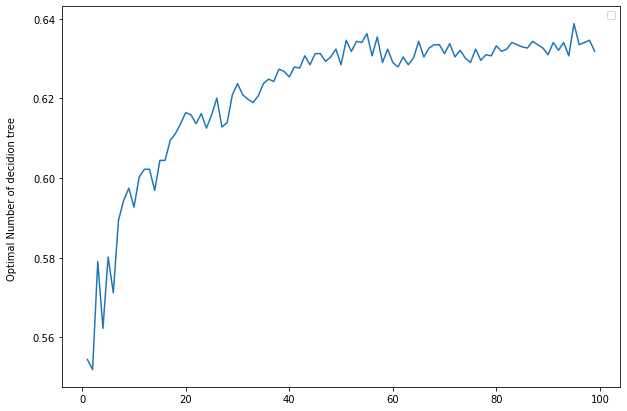

In [130]:
# we are trying to find the optimal number of decision trees to compose the best random forest.

score_array = []
for i in range(1, 100):
    rf_loop = RandomForestClassifier(n_estimators = i, random_state = 1)
    rf_loop.fit(X_train, y_train)
    score_array.append(rf_loop.score(X_test, y_test))
fig = plt.figure(figsize=(10,7))
plt.plot(range(1, 100),score_array)

plt.ylabel('Range\n', horizontalalignment="center")

plt.ylabel('Score\n', horizontalalignment="center")

plt.ylabel('Optimal Number of decidion tree \n', horizontalalignment="center")

plt.legend(loc='upper right', fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [131]:
np.argmax(score_array), score_array[np.argmax(score_array)]

(94, 0.638749302065885)

In [117]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(n_estimators = 94), param_grid=param_grid, cv= 5, verbose =0)
CV_rfc.fit(X_train, y_train)


In [118]:
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 500}
accuracy : 0.6282284325223569


In [121]:
#using the tuned hyperparameters
rf = RandomForestClassifier(n_estimators = 94,
                            criterion = 'gini', 
                            max_depth = 8).fit(X_train, y_train)
rf_result = calculate_results(y_true = y_test,
                              y_pred = rf.predict(X_test))
rf_result

{'accuracy': 62.953657174762704,
 'precision': 0.6279774034612603,
 'recall': 0.629536571747627,
 'f1': 0.62561734442793}

Gaussian NB

In [123]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
NB_cv = GridSearchCV(GaussianNB(), parameters, cv=5)
NB_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ", NB_cv.best_params_)
print("accuracy :", NB_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'var_smoothing': 0.001}
accuracy : 0.5732936796454551


In [124]:
#using the tuned hyperparameters

gausian_NB = GaussianNB(var_smoothing = 0.001).fit(X_train, y_train)
gausian_NB_result = calculate_results(y_true = y_test,
                              y_pred = gausian_NB.predict(X_test))
gausian_NB_result

{'accuracy': 57.11892797319933,
 'precision': 0.567466927048511,
 'recall': 0.5711892797319933,
 'f1': 0.5656019478573876}

KNN

In [125]:
#using the tuned hyperparameters
# k =71
knn = KNeighborsClassifier(n_neighbors = 71).fit(X_train, y_train)
knn_result = calculate_results(y_true = y_test,
                              y_pred = knn.predict(X_test))
knn_result

{'accuracy': 59.101060859854826,
 'precision': 0.5880517789294055,
 'recall': 0.5910106085985483,
 'f1': 0.584827760550424}

Decision Tree Classifier

In [126]:
param_grid = {#'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

tree_cv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True)
tree_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9}
accuracy : 0.6062411202410399


In [127]:
#using the tuned hyperparameters
tree = DecisionTreeClassifier(ccp_alpha = 0.001, 
                              criterion = 'entropy', 
                              max_depth = 9).fit(X_train, y_train)
tree_result = calculate_results(y_true = y_test,
                              y_pred = tree.predict(X_test))
tree_result

{'accuracy': 61.55778894472361,
 'precision': 0.6143609812753373,
 'recall': 0.6155778894472361,
 'f1': 0.6145888893856433}

In [128]:
all_results = pd.DataFrame({'Logistic Regression': LR_result,
                            "SVC": SVM_result,
                            'Kernel SVC' : kernel_SVM_result,
                            'Random Forest' : rf_result,
                            "Gaussian NB": gausian_NB_result,
                            'KNN': knn_result,
                            'Decision Tree Classifier' : tree_result}).T

In [129]:
all_results.sort_values(["precision", "recall", "f1"], ascending = False)


,accuracy,precision,recall,f1
Random Forest,62.953657,0.627977,0.629537,0.625617
Decision Tree Classifier,61.557789,0.614361,0.615578,0.614589
SVC,61.166946,0.609628,0.611669,0.606309
Kernel SVC,61.166946,0.609628,0.611669,0.606309
KNN,59.101061,0.588052,0.591011,0.584828
Logistic Regression,57.453936,0.571271,0.574539,0.556064
Gaussian NB,57.118928,0.567467,0.571189,0.565602



##Random Forest Classifier is giving best result

In [133]:
from sklearn.model_selection import cross_val_score
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=94)

In [135]:
accuracies = cross_val_score(estimator = rf, 
                             X = X_train, y = y_train, 
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f(+/- %0.2f)" % (accuracies.mean(),accuracies.std()*2))


Random Forest Classifier Accuracy: 0.62(+/- 0.02)


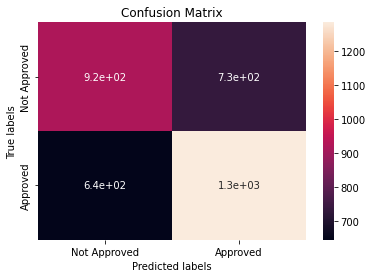

In [145]:
plot_confusion_matrix(y=y_test, 
                      y_predict = tree.predict(X_test))

###Evaluate the model using ROC Graph 
- ROC Graph shows us the capability of a model to distinguish b/w the classes based on AUC mean score. 
- The orange line represents the ROC Curve of a random classifer while a good classifier tries to remain as far away from that line as possible. 

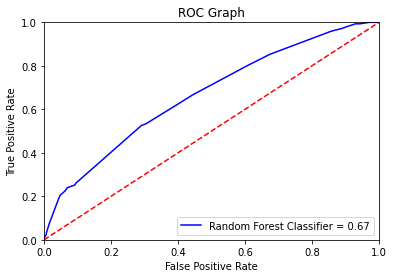

In [153]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Graph')
plt.plot(fpr, tpr, 'b', label = 'Random Forest Classifier = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
